In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data Processing

In [2]:
#File Pathway
smote_data_path = 'final_data_smote.csv'

In [3]:
smote_data = pd.read_csv(smote_data_path)
smote_data

,index,True_False_Ratio,hour_per_day,positive,negative,cases_per_100000,state_OR,is_claim,price_alt,is_delivery,is_pickup,updated_review_count,updated_rating,is_open_api
0,1,0.258065,12.857143,0.053364,0.009281,9099.600000,1.0,1.0,2.000000,1.000000,0.000000,129.000000,4.000000,1
1,2,0.684211,8.333333,0.050847,0.011299,15107.128560,0.0,1.0,2.000000,0.000000,0.000000,9.000000,4.000000,1
2,3,0.464286,10.333333,0.061224,0.018707,15107.128560,0.0,1.0,2.000000,1.000000,0.000000,43.000000,4.000000,1
3,4,0.666667,9.600000,0.048441,0.010316,4105.800000,1.0,1.0,1.780000,0.000000,0.000000,422.000000,4.500000,1
4,5,0.234043,15.000000,0.042189,0.017227,12351.681850,0.0,1.0,2.000000,0.000000,0.000000,473.000000,3.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11539,11540,0.465515,11.342206,0.048236,0.013274,12351.681850,0.0,1.0,1.910035,1.000000,0.591070,612.618047,3.704465,0
11540,11541,0.336425,8.635586,0.039915,0.013402,6130.081489,0.0,1.0,1.857224,0.351018,0.000000,134.710059,3.824491,0
11541,11542,0.816189,17.960779,0.058735,0.009733,9840.800000,1.0,1.0,1.780000,0.597385,0.597385,26.752934,5.000000,0
11542,11543,0.447975,10.993640,0.034735,0.019499,4648.728201,0.0,1.0,2.000000,0.728356,0.728356,119.731508,3.092534,0


In [4]:
#Drop "Index Column"
smote_data = smote_data.drop('index',1)
smote_data

,True_False_Ratio,hour_per_day,positive,negative,cases_per_100000,state_OR,is_claim,price_alt,is_delivery,is_pickup,updated_review_count,updated_rating,is_open_api
0,0.258065,12.857143,0.053364,0.009281,9099.600000,1.0,1.0,2.000000,1.000000,0.000000,129.000000,4.000000,1
1,0.684211,8.333333,0.050847,0.011299,15107.128560,0.0,1.0,2.000000,0.000000,0.000000,9.000000,4.000000,1
2,0.464286,10.333333,0.061224,0.018707,15107.128560,0.0,1.0,2.000000,1.000000,0.000000,43.000000,4.000000,1
3,0.666667,9.600000,0.048441,0.010316,4105.800000,1.0,1.0,1.780000,0.000000,0.000000,422.000000,4.500000,1
4,0.234043,15.000000,0.042189,0.017227,12351.681850,0.0,1.0,2.000000,0.000000,0.000000,473.000000,3.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11539,0.465515,11.342206,0.048236,0.013274,12351.681850,0.0,1.0,1.910035,1.000000,0.591070,612.618047,3.704465,0
11540,0.336425,8.635586,0.039915,0.013402,6130.081489,0.0,1.0,1.857224,0.351018,0.000000,134.710059,3.824491,0
11541,0.816189,17.960779,0.058735,0.009733,9840.800000,1.0,1.0,1.780000,0.597385,0.597385,26.752934,5.000000,0
11542,0.447975,10.993640,0.034735,0.019499,4648.728201,0.0,1.0,2.000000,0.728356,0.728356,119.731508,3.092534,0


In [5]:
#Change Column name
smote_data = smote_data.rename(columns={"updated_review_count": "review_count", "updated_rating": "rating","is_open_api":"is_open"})
smote_data

,True_False_Ratio,hour_per_day,positive,negative,cases_per_100000,state_OR,is_claim,price_alt,is_delivery,is_pickup,review_count,rating,is_open
0,0.258065,12.857143,0.053364,0.009281,9099.600000,1.0,1.0,2.000000,1.000000,0.000000,129.000000,4.000000,1
1,0.684211,8.333333,0.050847,0.011299,15107.128560,0.0,1.0,2.000000,0.000000,0.000000,9.000000,4.000000,1
2,0.464286,10.333333,0.061224,0.018707,15107.128560,0.0,1.0,2.000000,1.000000,0.000000,43.000000,4.000000,1
3,0.666667,9.600000,0.048441,0.010316,4105.800000,1.0,1.0,1.780000,0.000000,0.000000,422.000000,4.500000,1
4,0.234043,15.000000,0.042189,0.017227,12351.681850,0.0,1.0,2.000000,0.000000,0.000000,473.000000,3.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11539,0.465515,11.342206,0.048236,0.013274,12351.681850,0.0,1.0,1.910035,1.000000,0.591070,612.618047,3.704465,0
11540,0.336425,8.635586,0.039915,0.013402,6130.081489,0.0,1.0,1.857224,0.351018,0.000000,134.710059,3.824491,0
11541,0.816189,17.960779,0.058735,0.009733,9840.800000,1.0,1.0,1.780000,0.597385,0.597385,26.752934,5.000000,0
11542,0.447975,10.993640,0.034735,0.019499,4648.728201,0.0,1.0,2.000000,0.728356,0.728356,119.731508,3.092534,0


In [6]:
#Round the decimal from smote result for column price_alt, is_delivery，is_pickup，review_count
smote_data['price_alt'] = smote_data['price_alt'].round(decimals = 0)
smote_data['is_delivery'] = smote_data['is_delivery'].round(decimals = 0)
smote_data['is_pickup'] = smote_data['is_pickup'].round(decimals = 0)
smote_data['review_count'] = smote_data['review_count'].round(decimals = 0)
smote_data

,True_False_Ratio,hour_per_day,positive,negative,cases_per_100000,state_OR,is_claim,price_alt,is_delivery,is_pickup,review_count,rating,is_open
0,0.258065,12.857143,0.053364,0.009281,9099.600000,1.0,1.0,2.0,1.0,0.0,129.0,4.000000,1
1,0.684211,8.333333,0.050847,0.011299,15107.128560,0.0,1.0,2.0,0.0,0.0,9.0,4.000000,1
2,0.464286,10.333333,0.061224,0.018707,15107.128560,0.0,1.0,2.0,1.0,0.0,43.0,4.000000,1
3,0.666667,9.600000,0.048441,0.010316,4105.800000,1.0,1.0,2.0,0.0,0.0,422.0,4.500000,1
4,0.234043,15.000000,0.042189,0.017227,12351.681850,0.0,1.0,2.0,0.0,0.0,473.0,3.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11539,0.465515,11.342206,0.048236,0.013274,12351.681850,0.0,1.0,2.0,1.0,1.0,613.0,3.704465,0
11540,0.336425,8.635586,0.039915,0.013402,6130.081489,0.0,1.0,2.0,0.0,0.0,135.0,3.824491,0
11541,0.816189,17.960779,0.058735,0.009733,9840.800000,1.0,1.0,2.0,1.0,1.0,27.0,5.000000,0
11542,0.447975,10.993640,0.034735,0.019499,4648.728201,0.0,1.0,2.0,1.0,1.0,120.0,3.092534,0


In [7]:
#Record prediction data
y = smote_data['is_open']

## 1.1: Correlations between features

<AxesSubplot:>

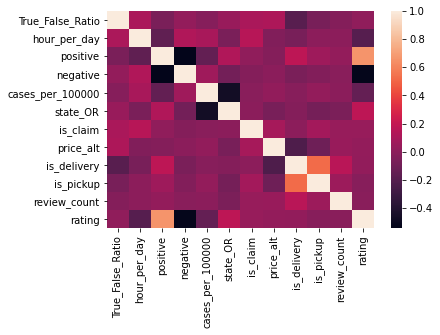

In [8]:
# correlations between features
corr_score = smote_data[['True_False_Ratio','hour_per_day','positive','negative',
                       'cases_per_100000','state_OR','is_claim','price_alt','is_delivery',
                       'is_pickup','review_count','rating']].corr()
# show heapmap of correlations
sns.heatmap(corr_score)

In [9]:
corr_score

,True_False_Ratio,hour_per_day,positive,negative,cases_per_100000,state_OR,is_claim,price_alt,is_delivery,is_pickup,review_count,rating
True_False_Ratio,1.000000,0.112537,-0.067445,0.026476,-0.025613,0.044329,0.103455,0.113429,-0.194159,-0.070193,-0.031473,0.012385
hour_per_day,0.112537,1.000000,-0.163905,0.127482,0.095749,-0.063589,0.152805,-0.041124,-0.070206,-0.000313,0.000035,-0.197034
positive,-0.067445,-0.163905,1.000000,-0.545226,-0.152306,0.126668,0.010759,-0.028612,0.176657,0.063077,0.023434,0.659370
negative,0.026476,0.127482,-0.545226,1.000000,0.069105,-0.090995,-0.029035,-0.007582,-0.066961,-0.035616,-0.009154,-0.531277
cases_per_100000,-0.025613,0.095749,-0.152306,0.069105,1.000000,-0.467306,-0.008362,0.016154,-0.018223,0.025079,-0.002981,-0.143409
state_OR,0.044329,-0.063589,0.126668,-0.090995,-0.467306,1.000000,-0.006178,-0.071762,-0.027955,-0.086315,-0.061397,0.174605
is_claim,0.103455,0.152805,0.010759,-0.029035,-0.008362,-0.006178,1.000000,0.089455,0.001388,0.080852,0.037380,0.040208
price_alt,0.113429,-0.041124,-0.028612,-0.007582,0.016154,-0.071762,0.089455,1.000000,-0.229011,-0.106935,0.040283,0.023737
is_delivery,-0.194159,-0.070206,0.176657,-0.066961,-0.018223,-0.027955,0.001388,-0.229011,1.000000,0.520952,0.156623,0.018288
is_pickup,-0.070193,-0.000313,0.063077,-0.035616,0.025079,-0.086315,0.080852,-0.106935,0.520952,1.000000,0.054109,-0.014447


# Part 2: Feature Preprocessing

feature encoding, feature scaling

In [10]:
#Create dummies variable for city and state 
to_drop = ['is_open']
X = smote_data.drop(to_drop, axis=1)

In [11]:
X

,True_False_Ratio,hour_per_day,positive,negative,cases_per_100000,state_OR,is_claim,price_alt,is_delivery,is_pickup,review_count,rating
0,0.258065,12.857143,0.053364,0.009281,9099.600000,1.0,1.0,2.0,1.0,0.0,129.0,4.000000
1,0.684211,8.333333,0.050847,0.011299,15107.128560,0.0,1.0,2.0,0.0,0.0,9.0,4.000000
2,0.464286,10.333333,0.061224,0.018707,15107.128560,0.0,1.0,2.0,1.0,0.0,43.0,4.000000
3,0.666667,9.600000,0.048441,0.010316,4105.800000,1.0,1.0,2.0,0.0,0.0,422.0,4.500000
4,0.234043,15.000000,0.042189,0.017227,12351.681850,0.0,1.0,2.0,0.0,0.0,473.0,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
11539,0.465515,11.342206,0.048236,0.013274,12351.681850,0.0,1.0,2.0,1.0,1.0,613.0,3.704465
11540,0.336425,8.635586,0.039915,0.013402,6130.081489,0.0,1.0,2.0,0.0,0.0,135.0,3.824491
11541,0.816189,17.960779,0.058735,0.009733,9840.800000,1.0,1.0,2.0,1.0,1.0,27.0,5.000000
11542,0.447975,10.993640,0.034735,0.019499,4648.728201,0.0,1.0,2.0,1.0,1.0,120.0,3.092534


# Part 3: Model Training and Result Evaluation

## Part 3.1: Split dataset

In [12]:
from sklearn import model_selection
# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, stratify = y)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 9235 observation with 12 features
test data has 2309 observation with 12 features


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Part 3.2: Model Training and Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [15]:
# Train the logistic model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Train the random forest model
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Train the knn model
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.60855441 0.62533839 0.62587981 0.62046562 0.60097455]
Model accuracy of Logistic Regression is 0.616242555495398
[0.79967515 0.79967515 0.79209529 0.80671359 0.7953438 ]
Model accuracy of KNN is 0.7987005955603681
[0.92961559 0.93719545 0.93611262 0.93936113 0.93611262]
Model accuracy of Random Forest is 0.9356794802382241


## Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [19]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [20]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.1, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')})

In [21]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.616242555495398
Best parameters set:
C:1
penalty:l1


In [22]:
# best model
best_LR_model = Grid_LR.best_estimator_

## Part 3.3.2: Find Optimal Hyperparameters: KNN

In [23]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [24]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8529507309149972
Best parameters set:
n_neighbors:1


In [25]:
best_KNN_model = Grid_KNN.best_estimator_

## Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [26]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [27]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.9340552246886844
Best parameters set:
n_estimators:80


In [28]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

## Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    F1 = (2*recall*precision)/(recall+precision)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ("F1 score is: " + str(F1))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Close']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Greens'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.9475963620614984
precision is: 0.9380831212892281
recall is: 0.9584055459272097
F1 score is: 0.9481354479211316


<ipython-input-29-442f257f1865>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-29-442f257f1865>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


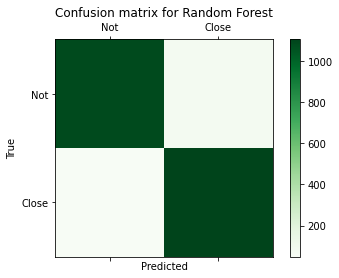

Logistic Regression
Accuracy is: 0.6132524902555219
precision is: 0.6332992849846782
recall is: 0.537261698440208
F1 score is: 0.5813408345053915


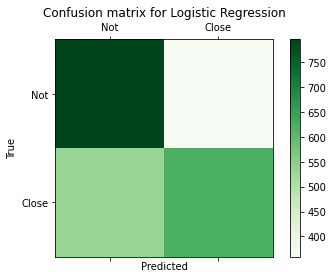

K nearest neighbor
Accuracy is: 0.8575140753572975
precision is: 0.9469122426868906
recall is: 0.75736568457539
F1 score is: 0.8415984593163216


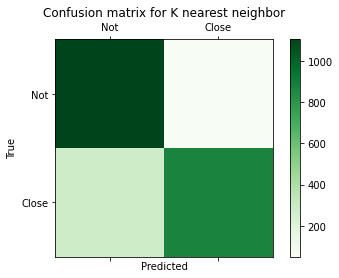

In [30]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

## Part 3.4: Model Evaluation - ROC & AUC

### Part 3.4.1: ROC of RF Model

In [31]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [32]:
best_RF_model.predict_proba(X_test)

array([[0.675 , 0.325 ],
       [0.65  , 0.35  ],
       [0.775 , 0.225 ],
       ...,
       [0.6875, 0.3125],
       [0.8875, 0.1125],
       [0.5   , 0.5   ]])

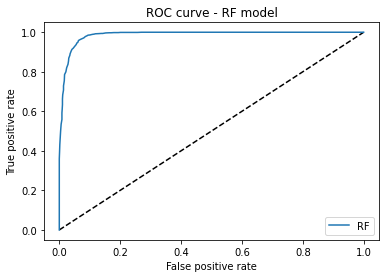

In [33]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [34]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9863096175921133

### Part 3.4.2: ROC of LR Model

In [35]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

In [36]:
best_LR_model.predict_proba(X_test)

array([[0.481941  , 0.518059  ],
       [0.41115699, 0.58884301],
       [0.31670837, 0.68329163],
       ...,
       [0.57836978, 0.42163022],
       [0.56462324, 0.43537676],
       [0.60981879, 0.39018121]])

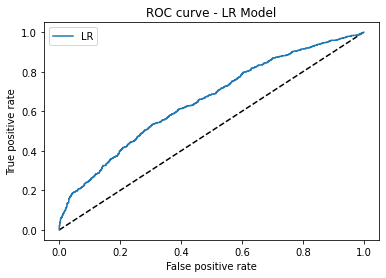

In [37]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [38]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.6532692610682214

### Part 3.4.3: ROC of KNN Model

In [39]:
y_pred_lr = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_pred_lr)

In [40]:
best_KNN_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

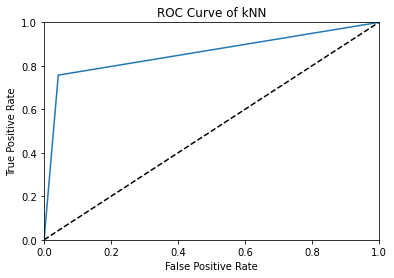

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_knn, tpr_knn, label='LR')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [42]:
metrics.auc(fpr_knn,tpr_knn)

0.8574707210755738

# Part 4: Feature Importance

## Part 4.1: Random Forest Model - Feature Selection Discussion

Text(0.5, 0, 'Random Forest Feature Importance')

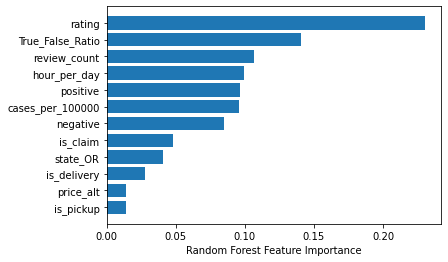

In [43]:
# random forest for feature importance 
from matplotlib import pyplot
# get importance
importance = classifier_RF.feature_importances_
features_name =X.columns
#Plotting
sorted_idx = importance.argsort()
plt.barh(features_name[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")